In [24]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact

from scipy.special import comb

mpl.rcParams['figure.figsize'] = (15, 8)

np.random.seed(1234)
n_iter = int(1e4)  # number of iterations, for measurement

In [50]:
def plot_dist(x, y_experiment, pdf_theory, ymax=.3, xmax=100):
    y_theory = np.fromiter((pdf_theory(i) for i in x), dtype=float)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(x, y_theory, lw=7, color='gray', alpha=.5, label='pdf or pmf')
    ax2.plot(x, y_theory.cumsum(), lw=7, color='gray', alpha=.5)

    ax1.plot(x, y_experiment, color='blue', label='cum. rel. freq.')
    ax2.plot(x, y_experiment.cumsum(), color='red', label='cum. rel. freq.')

    
    ax1.xaxis.grid(True)
    ax1.set_ylabel('pdf')
    ax2.set_ylabel('cdf')
    if xmax is not None:
        plt.xlim(0, xmax)
    if ymax is not None:
        ax1.set_ylim(0, ymax)
    ax2.set_ylim(0, 1)
    
    #plt.show()


# Binomial Distribution

二項分布。

### Parameters
- $n$: number of trials
- $p$: proberbility of success

確率$p$で成功する独立な試行を$n$回行ったときの成功回数$X$が従う分布。$X \sim B(n, p)$と書き表す。

### pmf
$n$回の試行のうち、特定の$x$回の試行 (たとえば、最初の$x$回) で成功して残りの$(n - x)$回失敗する確率は、

$$
p^x (1-p)^{(n-x)}
$$

どの$x$回でもよいので$x$回成功する確率を求めたい。これは上記の$\binom{x}{n}$倍すればいいので、確率質量関数$f$は

$$
f(x; n, p) = \binom{x}{n} p^x (1-p)^{(n-x)}
$$


In [42]:
def pdf_theory(n, p, x):
    return comb(n, x) * (p ** x) * ((1 - p) ** (n - x))

### Relative Frequency
相対度数を求める。上記に従って淡々と。

In [43]:
def rf_experiment(n, p, n_iter):
    success_or_not = np.random.choice((True, False), size=(n_iter, n), p=(p, 1 - p))
    x = success_or_not.sum(axis=1, dtype=int)
    return np.fromiter(
        ((x == k).sum() for k in range(n + 1)),
        dtype=float
    ) / n_iter

### Mean
定義より、$n=1$のとき、期待値は$p$。
$n>1$としたとき、それぞれの試行は独立なので、期待値は各試行の期待値の和になる。よって、

$$
E[X] = np \ \mathrm{for} \ X \sim B(n, p)
$$

### Numerical Example
相対度数とpmfをプロットしてみる。

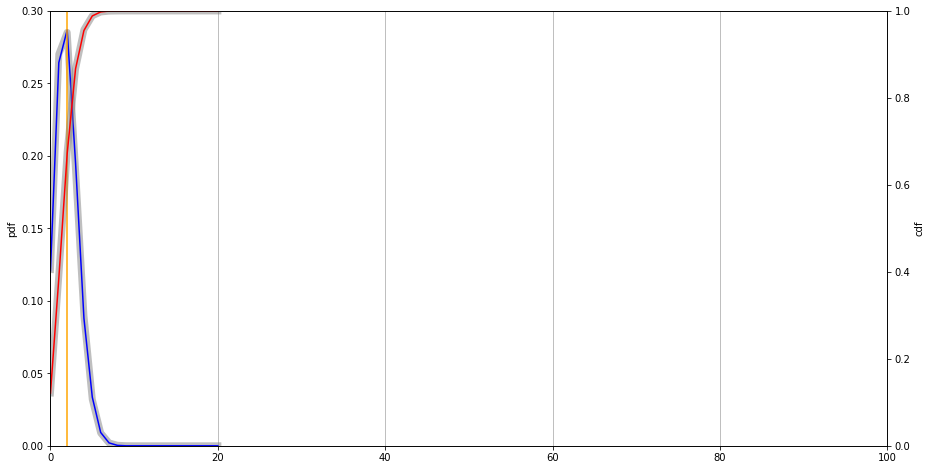

In [60]:
#@interact
def plot_help(n: (1, 100, 1)=20, p: (0, 1, .1)=.1):
    plot_dist(
        np.arange(n + 1), 
        rf_experiment(n, p, n_iter), 
        lambda k: pdf_theory(n, p, k),
        xmax=100, ymax=.3
    )
    plt.vlines(n*p, 0, 1, colors='orange')
plot_help()